In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
# Importing dataset and examining it
dataset = pd.read_csv("Drink.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
print(dataset.isnull().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9  
(4898, 1

In [3]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap_drink.html')

'corrheatmap_drink.html'

In [3]:
# Dropping columns with high correlation + causation
dataset = dataset.drop(['density'], axis = 1)
print(type(dataset))
print(dataset.shape)

<class 'pandas.core.frame.DataFrame'>
(4898, 10)


In [4]:
#Whole Dataset
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X0 = feature_scaler.fit_transform(dataset)

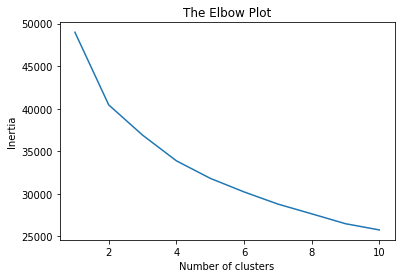

In [5]:
# Whole Dataset
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X0)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
#Whole Dataset
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
#Whole Dataset
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X0)
x_pca = pca.transform(X0)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.24569844 0.15751557]
Total variance explained by the n_components:  0.4032140053587771


Cluster Centers: 
 [[ 0.16474174  0.03458484  0.23673196  0.78001602  0.39419716  0.653106
   0.79498171 -0.21936917  0.07616636 -0.75423379]
 [-0.11350138 -0.02382777 -0.16310016 -0.53740414 -0.27158825 -0.44996751
  -0.54771499  0.15113779 -0.052476    0.51964107]]


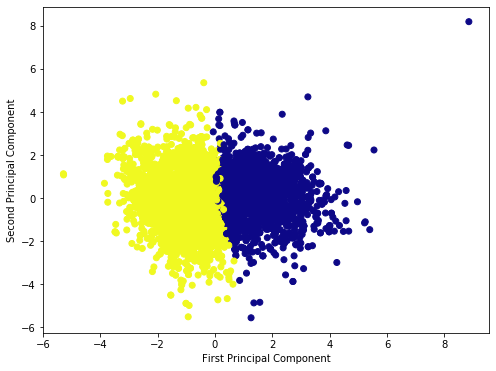

In [8]:
#Whole Dataset
# If K=2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X0)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [11]:
#Whole Dataset
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =150,n_iter=5000)
x_tsne = tsne.fit_transform(X0)

fa = list(dataset['fixed acidity'])
va = list(dataset['volatile acidity'])
ca = list(dataset['citric acid'])
rs = list(dataset['residual sugar'])
cl = list(dataset['chlorides'])
tsd = list(dataset['total sulfur dioxide'])
fsd = list(dataset['total sulfur dioxide'])
ph = list(dataset['pH'])
sp = list(dataset['sulphates'])
a = list(dataset['alcohol'])



data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f': f: {a}; v: {b}, c:{c}, r:{d}, cl:{e}, tsd:{f}, fsd:{g}, ph:{h}, sp:{i}, a:{j}' for a,b,c,d,e,f,g,h,i,j in list(zip(fa,va,ca,rs,cl, tsd,fsd,ph,sp,a))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_Subset0.html')

't-SNE_Subset0.html'

In [26]:
# Dividing data into subsets (Taking residual sugar in common with all subsets)
#Subset1
subset1 = dataset[['fixed acidity','volatile acidity','pH','alcohol','residual sugar']]

#Subset2
subset2 = dataset[['residual sugar','free sulfur dioxide','total sulfur dioxide']] 

#Subset3
subset3 = dataset[['residual sugar','sulphates','citric acid', 'chlorides']]

#Subset4
subset4 = dataset

#Subset5
subset5 = dataset[['fixed acidity','alcohol','residual sugar']]



In [27]:
#Converting rs into categorical values for all subsets
def converter(column):
    if column < 6.39: #mean
        return 0 # bad
    else:
        return 1 # good

subset1['residual sugar'] = subset1['residual sugar'].apply(converter)
print(subset1.head())

subset2['residual sugar'] = subset2['residual sugar'].apply(converter)
print(subset2.head())

subset3['residual sugar'] = subset3['residual sugar'].apply(converter)
print(subset3.head())

subset4['residual sugar'] = dataset['residual sugar'].apply(converter)
print(subset4.head())

subset5['residual sugar'] = subset5['residual sugar'].apply(converter)
print(subset5.head())




   fixed acidity  volatile acidity    pH  alcohol  residual sugar
0            7.0              0.27  3.00      8.8               1
1            6.3              0.30  3.30      9.5               0
2            8.1              0.28  3.26     10.1               1
3            7.2              0.23  3.19      9.9               1
4            7.2              0.23  3.19      9.9               1
   residual sugar  free sulfur dioxide  total sulfur dioxide
0               1                 45.0                 170.0
1               0                 14.0                 132.0
2               1                 30.0                  97.0
3               1                 47.0                 186.0
4               1                 47.0                 186.0
   residual sugar  sulphates  citric acid  chlorides
0               1       0.45         0.36      0.045
1               0       0.49         0.34      0.049
2               1       0.44         0.40      0.050
3               1       0.

In [28]:
#Subset1
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(subset1)

#Subset2
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X2 = feature_scaler.fit_transform(subset2)

#Subset3
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X3 = feature_scaler.fit_transform(subset3)

#Subset4
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X4 = feature_scaler.fit_transform(subset4)

#Subset5
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X5 = feature_scaler.fit_transform(subset5)


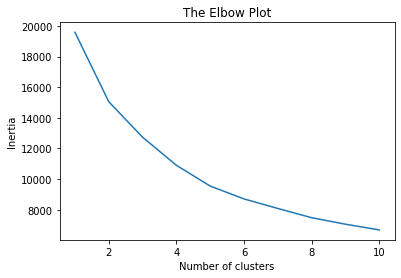

In [66]:
# Subset1
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [67]:
#Subset1
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [68]:
#Subset1
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.37169912 0.26105483]
Total variance explained by the n_components:  0.632753948840078


Cluster Centers: 
 [[ 0.4937467   0.02185247 -0.59069883 -0.38712183  0.        ]
 [-0.6150893  -0.02722291  0.73586828  0.48226044  0.        ]]


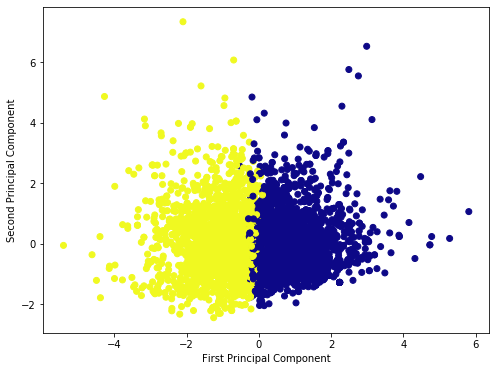

In [69]:
#Subset1
# If K=2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [71]:
#Subset1
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =80,n_iter=2000)
x_tsne = tsne.fit_transform(X)

fa = list(subset1['fixed acidity'])
va = list(subset1['volatile acidity'])
ph = list(subset1['pH'])
a = list(subset1['alcohol'])
rs = list(subset1['residual sugar'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f': f: {a}; v: {b}, p:{c}, a:{d}, r:{e}' for a,b,c,d,e in list(zip(fa,va,ph,a,rs))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_S1.html')

't-SNE_S1_final.html'

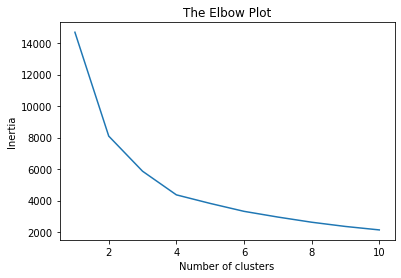

In [18]:
# Subset2
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
#Subset2
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
#Subset2
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X2)
x_pca = pca.transform(X2)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.63698531 0.23926073]
Total variance explained by the n_components:  0.8762460369713868


Cluster Centers: 
 [[ 0.91023175  0.63685171  0.71478502]
 [-0.70276214 -0.49169376 -0.55186369]]


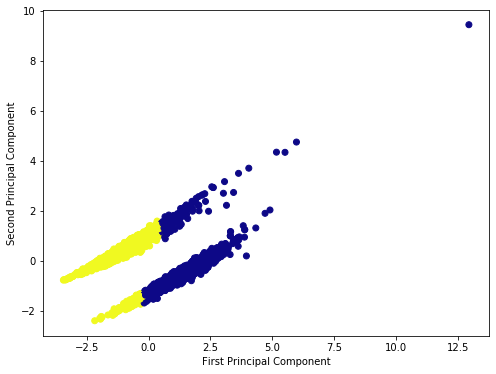

In [21]:
#Subset2
# If K=2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X2)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [30]:
#Subset2 - Target Variable > Residual Sugar
# Implementing t-SNE to visualize dataset - Successful
tsne = TSNE(n_components = 2, perplexity =130,n_iter=2000)
x_tsne = tsne.fit_transform(X2)

rs = list(subset2['residual sugar'])
fs = list(subset2['free sulfur dioxide'])
ts = list(subset2['total sulfur dioxide'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'rs: {a}, fs: {b}, ts:{c}' for a,b,c, in list(zip(rs,fs,ts))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_S2.html')

't-SNE_S2.html'

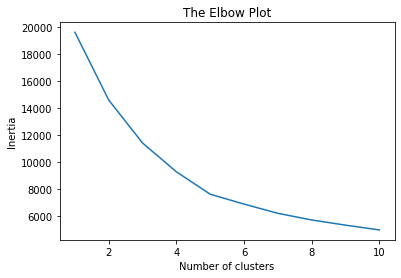

In [8]:
# Subset3
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X3)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [9]:
#Subset3
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
#Subset3
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X3)
x_pca = pca.transform(X3)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.29836386 0.26532128]
Total variance explained by the n_components:  0.5636851317108791


Cluster Centers: 
 [[-8.88566600e-01 -4.23572289e-01 -2.10586129e-01 -2.19653059e-01]
 [ 1.12540804e+00 -2.49559875e-01 -3.68773594e-01 -4.46890801e-03]
 [ 9.29016636e-01  4.20578328e-02  1.76968455e+00  5.27825685e-02]
 [-3.26977516e-01 -2.10153471e-01  9.25251626e-01  5.42249545e+00]
 [-6.48935927e-01  1.62932003e+00 -4.19301431e-02 -2.08237144e-01]]


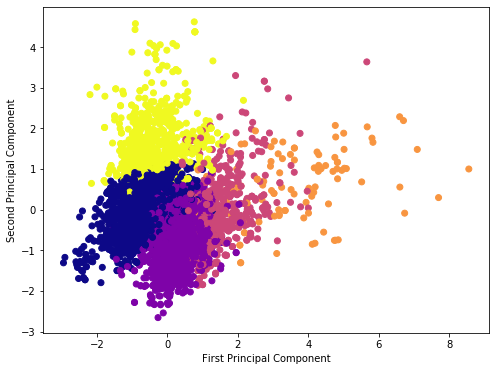

In [11]:
#Subset3
# If K=5
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X3)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [14]:
#Subset3 - Target Variable > Residual Sugar
# Implementing t-SNE to visualize dataset - Successful
tsne = TSNE(n_components = 2, perplexity =220,n_iter=2000)
x_tsne = tsne.fit_transform(X3)

rs = list(subset3['residual sugar'])
sp = list(subset3['sulphates'])
ca = list(subset3['citric acid'])
cl = list(subset3['chlorides'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'rs: {a}, sp: {b}, ca:{c}, cl:{d}' for a,b,c,d in list(zip(rs,sp,ca,cl))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_S3.html')



't-SNE_S3.html'

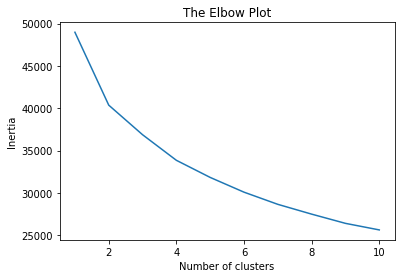

In [29]:
# Subset4
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X4)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [30]:
#Subset4
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#Subset4
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X4)
x_pca = pca.transform(X4)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.24593018 0.15752884]
Total variance explained by the n_components:  0.4034590233786932


Cluster Centers: 
 [[ 0.18166185  0.0296296   0.22018656  0.81379019  0.36160664  0.60537175
   0.73648474 -0.22317712  0.02565604 -0.72176557]
 [-0.1356633  -0.0221271  -0.16443319 -0.60773062 -0.27004433 -0.45208575
  -0.54999966  0.16666651 -0.01915968  0.53900752]]


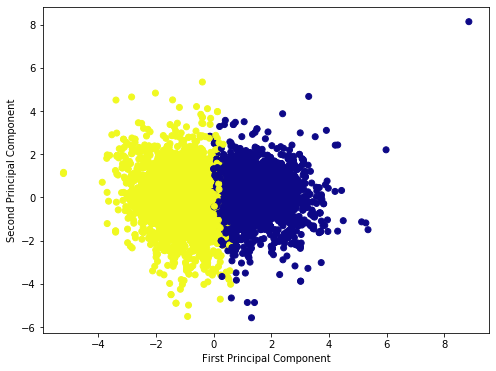

In [32]:
#Subset4
# If K=2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X4)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [34]:
#Subset4
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =110,n_iter=2000)
x_tsne = tsne.fit_transform(X4)

fa = list(subset4['fixed acidity'])
va = list(subset4['volatile acidity'])
ca = list(subset4['citric acid'])
rs = list(subset4['residual sugar'])
cl = list(subset4['chlorides'])
tsd = list(subset4['total sulfur dioxide'])
fsd = list(subset4['total sulfur dioxide'])
ph = list(subset4['pH'])
sp = list(subset4['sulphates'])
a = list(subset4['alcohol'])



data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f': f: {a}; v: {b}, c:{c}, r:{d}, cl:{e}, tsd:{f}, fsd:{g}, ph:{h}, sp:{i}, a:{j}' for a,b,c,d,e,f,g,h,i,j in list(zip(fa,va,ca,rs,cl, tsd,fsd,ph,sp,a))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_fulldataset_110.html')

't-SNE_fulldataset_110.html'

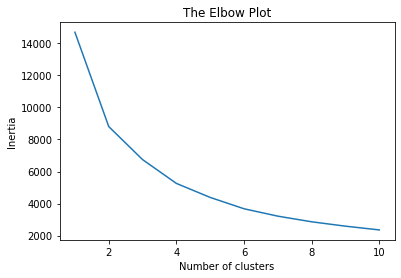

In [35]:
# Subset5
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X5)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [36]:
#Subset5
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
#Subset5
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X5)
x_pca = pca.transform(X5)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.49519688 0.31785378]
Total variance explained by the n_components:  0.8130506574017045


Cluster Centers: 
 [[ 0.11135025 -0.50971739  1.12540804]
 [-0.08697467  0.39813562 -0.87904599]]


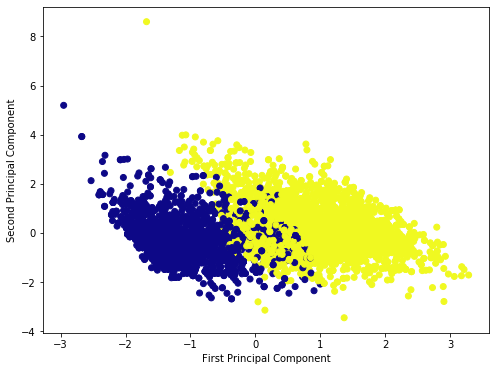

In [38]:
#Subset5
# If K=5
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X5)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [39]:
#Subset5 - Residual Sigar
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =150,n_iter=2000)
x_tsne = tsne.fit_transform(X5)

fa = list(subset1['fixed acidity'])
a = list(subset1['alcohol'])
rs = list(subset1['residual sugar'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f': f: {a}; a:{d}, r:{e}' for a,d,e in list(zip(fa,a,rs))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_S5_2.html')

't-SNE_S5_2.html'

In [24]:
# Dividing data into subsets
#Subset6
subset6 = dataset[['fixed acidity','volatile acidity','pH','alcohol','total sulfur dioxide']]


In [16]:
#Subset6
def converter(column):
    if column < 138.36: #mean
        return 0 # bad
    else:
        return 1 # good

subset6['total sulfur dioxide'] = subset6['total sulfur dioxide'].apply(converter)
print(subset6.head())

   fixed acidity  volatile acidity    pH  alcohol  total sulfur dioxide
0            7.0              0.27  3.00      8.8                     0
1            6.3              0.30  3.30      9.5                     0
2            8.1              0.28  3.26     10.1                     0
3            7.2              0.23  3.19      9.9                     0
4            7.2              0.23  3.19      9.9                     0


In [9]:
#Subset6
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()

X6 = feature_scaler.fit_transform(subset6)


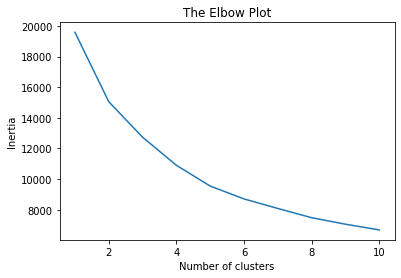

In [56]:
# Subset6
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X6)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
#Subset6
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
#Subset6
# Implementing t-SNE to visualize dataset
tsne = TSNE(n_components = 2, perplexity =150,n_iter=2000)
x_tsne = tsne.fit_transform(X6)

fa = list(subset6['fixed acidity'])
va = list(subset6['volatile acidity'])
ph = list(subset6['pH'])
a = list(subset6['alcohol'])
tsd = list(subset6['total sulfur dioxide'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f': f: {a}; v: {b}, p:{c}, a:{d}, tsd:{e}' for a,b,c,d,e in list(zip(fa,va,ph,a,tsd))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE_S6.html')

't-SNE_S6.html'